<a href="https://colab.research.google.com/github/MichalWilk45/MichalWilk45/blob/main/DS_2_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

# Utwórz sieć z 1 jednostką liniową
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])

# Wymagane środowisko Python ≥3.5
import sys
assert sys.version_info >= (3, 5)

# Wymagana biblioteka Scikit-Learn ≥0.20
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version istnieje jedynie w środowisku Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# Wymagany moduł TensorFlow ≥2.0
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Importuje standardowe biblioteki
import numpy as np
import os

# Aby wyniki uzyskiwane w tym notatniku były odtwarzalne
np.random.seed(42)

# Do rysowania ładnych wykresów
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [4]:
import pandas as pd
from IPython.display import display

from google.colab import drive
drive.mount('/gdrive')

def load_red_wine():
    return pd.read_csv("/gdrive/My Drive/red-wine.csv")

red_wine = load_red_wine()

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [6]:
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
red_wine.shape # (rows, columns)
input_shape = [11]

(1599, 12)

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=1, input_shape=[11])
])

In [9]:
w, b = model.weights

print("Weights\n{}\n\nBias\n{}".format(w, b))

Weights
<tf.Variable 'dense_1/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[-0.6878927 ],
       [ 0.46933264],
       [-0.52015346],
       [ 0.68327135],
       [-0.5830389 ],
       [-0.6580603 ],
       [-0.19161224],
       [-0.3739056 ],
       [-0.6966874 ],
       [ 0.1541853 ],
       [ 0.13812059]], dtype=float32)>

Bias
<tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [12]:
# pythonCopy code
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    # the linear output layer
    layers.Dense(units=1),
])

In [13]:
model.compile(
    optimizer="adam",
    loss="mae",
)

In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

fuel = pd.read_csv("/gdrive/My Drive/fuel.csv")

In [17]:

X = fuel.copy()
# Usuń zmienną celu
y = X.pop('FE')

In [18]:
fuel.head()

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


In [19]:
fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   EngDispl             1107 non-null   float64
 1   NumCyl               1107 non-null   int64  
 2   Transmission         1107 non-null   object 
 3   FE                   1107 non-null   float64
 4   AirAspirationMethod  1107 non-null   object 
 5   NumGears             1107 non-null   int64  
 6   TransLockup          1107 non-null   int64  
 7   TransCreeperGear     1107 non-null   int64  
 8   DriveDesc            1107 non-null   object 
 9   IntakeValvePerCyl    1107 non-null   int64  
 10  ExhaustValvesPerCyl  1107 non-null   int64  
 11  CarlineClassDesc     1107 non-null   object 
 12  VarValveTiming       1107 non-null   int64  
 13  VarValveLift         1107 non-null   int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 121.2+ KB


In [20]:
preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

In [21]:
X = preprocessor.fit_transform(X)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


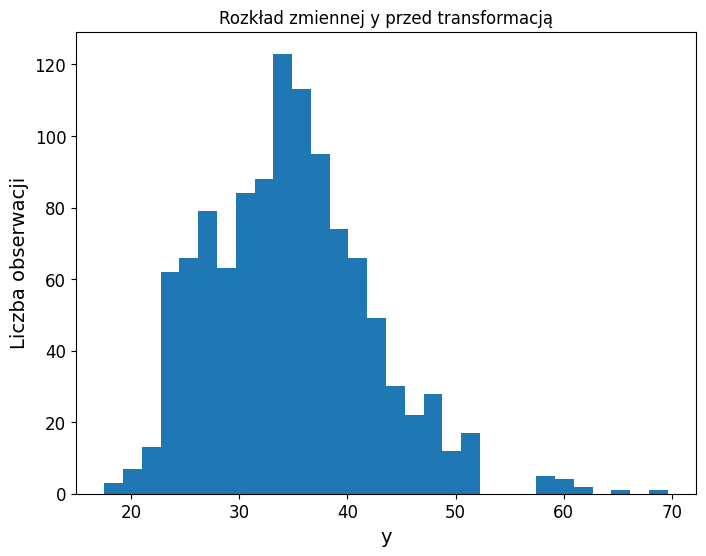

In [22]:
# wykres histogramu przed transformacją
plt.figure(figsize=(8, 6))
plt.hist(y, bins=30)
plt.title('Rozkład zmiennej y przed transformacją')
plt.xlabel('y')
plt.ylabel('Liczba obserwacji')
plt.show()

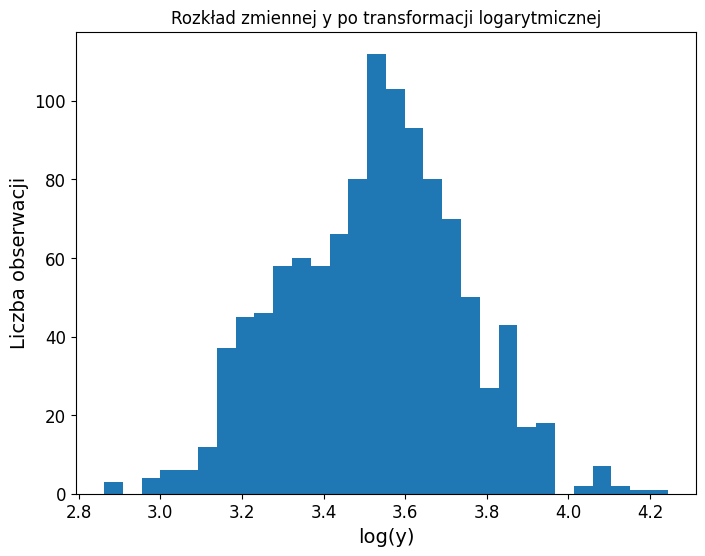

In [23]:
y = np.log(y) # zastosuj transformację logarytmiczną dla zmiennej celu zamiast standardyzacji


# wykres histogramu po transformacji
plt.figure(figsize=(8, 6))
plt.hist(y, bins=30)
plt.title('Rozkład zmiennej y po transformacji logarytmicznej')
plt.xlabel('log(y)')
plt.ylabel('Liczba obserwacji')
plt.show()

In [24]:
input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [50]


In [25]:
fuel.head()

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


In [26]:
pd.DataFrame(X[:10,:]).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.296693,2.120794,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

In [28]:
model.compile(
    optimizer='adam',
    loss='mae'
)

In [29]:
history = model.fit(
    X, y,
    batch_size=128,
    epochs=200
)

Epoch 1/200
9/9 [==============================] - 4s 9ms/step - loss: 2.8182
Epoch 2/200
9/9 [==============================] - 0s 8ms/step - loss: 1.0653
Epoch 3/200
9/9 [==============================] - 0s 6ms/step - loss: 0.6272
Epoch 4/200
9/9 [==============================] - 0s 6ms/step - loss: 0.3678
Epoch 5/200
9/9 [==============================] - 0s 7ms/step - loss: 0.2445
Epoch 6/200
9/9 [==============================] - 0s 8ms/step - loss: 0.1853
Epoch 7/200
9/9 [==============================] - 0s 7ms/step - loss: 0.1512
Epoch 8/200
9/9 [==============================] - 0s 8ms/step - loss: 0.1168
Epoch 9/200
9/9 [==============================] - 0s 7ms/step - loss: 0.0996
Epoch 10/200
9/9 [==============================] - 0s 8ms/step - loss: 0.0884
Epoch 11/200
9/9 [==============================] - 0s 9ms/step - loss: 0.0753
Epoch 12/200
9/9 [==============================] - 0s 7ms/step - loss: 0.0715
Epoch 13/200
9/9 [==============================] - 0s 8ms/st

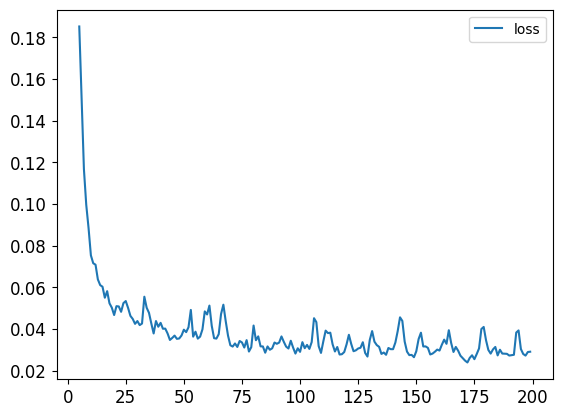

In [30]:
import pandas as pd

history_df = pd.DataFrame(history.history)
history_df.loc[5:, ['loss']].plot();

In [31]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation, rc
rc('animation', html='html5')
plt.style.use('seaborn-whitegrid')

def animate_sgd(num_examples, batch_size, steps, learning_rate,
                true_w=3.0, true_b=2.0, seed=0):
    # Define model
    class Model(object):
        def __init__(self, w_init=-1.0, b_init=-1.0):
            self.W = tf.Variable(w_init)
            self.b = tf.Variable(b_init)

        def __call__(self, x):
            return self.W * x + self.b
            
    def loss(target_y, predicted_y):
        return tf.reduce_mean(tf.square(target_y - predicted_y))

    def train(model, inputs, outputs, learning_rate):
        with tf.GradientTape() as t:
            current_loss = loss(outputs, model(inputs))
            dW, db = t.gradient(current_loss, [model.W, model.b])
            model.W.assign_sub(learning_rate * dW)
            model.b.assign_sub(learning_rate * db)
    # Data
    inputs  = tf.random.normal(shape=[num_examples], seed=seed)
    noise   = tf.random.normal(shape=[num_examples], seed=seed+1)
    outputs = inputs * true_w + true_b + noise
    ds = (tf.data.Dataset
          .from_tensor_slices((inputs, outputs))
          .shuffle(1000, seed=seed)
          .batch(batch_size)
          .repeat())
    ds = iter(ds)
    model = Model()
    # Collect the history of W-values and b-values to plot later
    Ws, bs, xs, ys, ls = [], [], [], [], []
    # Construct plot
    fig = plt.figure(dpi=100, figsize=(8, 3))

    # Regression Line
    ax1 = fig.add_subplot(131)
    ax1.set_title("Fitted Line")
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.set_xlim(-3, 2.5)
    ax1.set_ylim(-8, 11)
    p10, = ax1.plot(inputs, outputs, 'r.', alpha=0.1) # full dataset
    p11, = ax1.plot([], [], 'C3.') # batch, color Red
    p12, = ax1.plot([], [], 'k') # fitted line, color Black

    # Loss
    ax2 = fig.add_subplot(132)
    ax2.set_title("Training Loss")
    ax2.set_xlabel("Batches Seen")
    ax2.set_xlim(0, steps)
    ax2.set_ylim(0, 40)
    p20, = ax2.plot([], [], 'C0') # color Blue

    # Weights
    ax3 = fig.add_subplot(133)
    ax3.set_title("Weights")
    ax3.set_xlabel("Batches Seen")
    ax3.set_xlim(0, steps)     # 
    ax3.set_ylim(-2, 4)
    ax3.plot(range(steps), [true_w for _ in range(steps)], 'C5--')
    ax3.plot(range(steps), [true_b for _ in range(steps)], 'C8--')
    p30, = ax3.plot([], [], 'C5') # W color Brown
    p30.set_label('W')
    p31, = ax3.plot([], [], 'C8') # b color Green
    p31.set_label('b')
    ax3.legend()

    fig.tight_layout()

    def init():
        return [p10]

    def update(epoch):
        x, y = next(ds)
        y_pred = model(x)
        current_loss = loss(y, y_pred)
          
        Ws.append(model.W.numpy())
        bs.append(model.b.numpy())
        xs.append(x.numpy())
        ys.append(y_pred.numpy())
        ls.append(current_loss.numpy())
        p11.set_data(x.numpy(), y.numpy())
        inputs = tf.linspace(-3.0, 2.5, 30)
        p12.set_data(inputs, Ws[-1]*inputs + bs[-1])
        p20.set_data(range(epoch), ls)
        p30.set_data(range(epoch), Ws)
        p31.set_data(range(epoch), bs)

        train(model, x, y, learning_rate=learning_rate)
        #   print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        #         (epoch, Ws[-1], bs[-1], current_loss))
        
        return p11, p12, p20

    ani = animation.FuncAnimation(
        fig,
        update,
        frames=range(1, steps),
        init_func=init,
        blit=True,
        interval=100,
    )
    plt.close()
    return ani
    
# Convert mp4 to gif:
# ffmpeg -i temp.mp4 -filter_complex "[0:v] fps=12,scale=480:-1,split [a][b];[a] palettegen [p];[b][p] paletteuse" temp.gif

<ipython-input-31-f80d032e29e8>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [32]:
learning_rate = 0.0001
batch_size = 32
num_examples = 256

animate_sgd(
    learning_rate=learning_rate,
    batch_size=batch_size,
    num_examples=num_examples,
    steps=100, 
    true_w=3.0,
    true_b=2.0, 
)

In [33]:
learning_rate = 0.05
batch_size = 32
num_examples = 256

animate_sgd(
    learning_rate=learning_rate,
    batch_size=batch_size,
    num_examples=num_examples,
    steps=100, 
    true_w=3.0,
    true_b=2.0, 
)

In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
tf.__version__

'2.12.0'

In [36]:
fashion_mnist = keras.datasets.fashion_mnist # https://www.kaggle.com/zalando-research/fashionmnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [38]:
X_train_full.shape

(60000, 28, 28)

In [39]:
X_valid, X_train = X_train_full[:5000]/255., X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test /255.

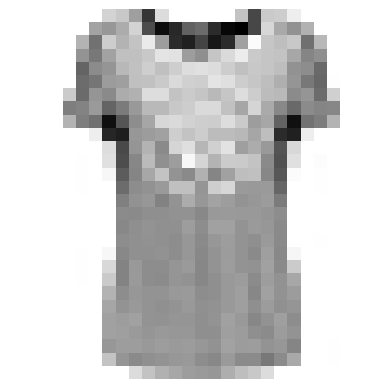

In [40]:
plt.imshow(X_train[1], cmap="binary")
plt.axis('off')
plt.show()

In [41]:
class_names = ["Koszulka", "Spodnie", "Sweter", "Sukienka", "Płaszcz",
               "Sandał", "Koszula", "Sneakers", "Torebka", "Botki"]

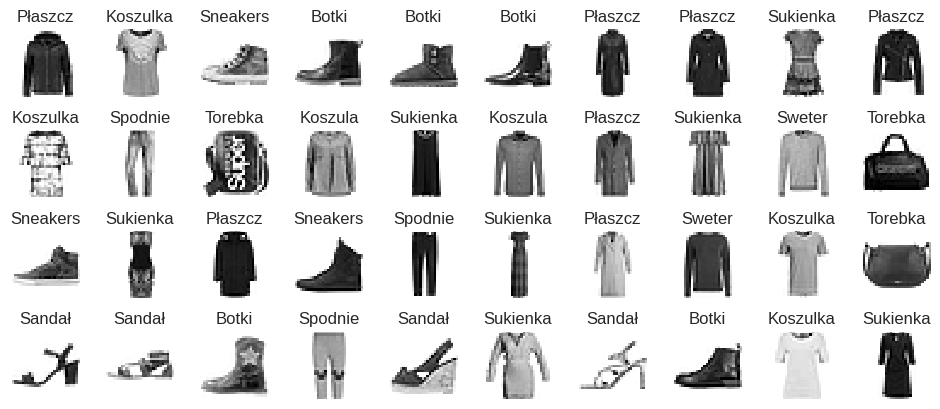

In [42]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [43]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [44]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28])) # wktor 784
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))




# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(300, activation="relu"),
#     keras.layers.Dense(100, activation="relu"),
#     keras.layers.Dense(10, activation="softmax")
# ])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.layers

In [47]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [48]:
weights, biases = hidden1.get_weights()

In [49]:
weights.shape # 28*28 = 784 | 300 is the depth

(784, 300)

In [50]:
weights

array([[ 0.06346962, -0.06683244,  0.00640281, ...,  0.05940403,
         0.07062002,  0.06684512],
       [ 0.05337068,  0.01071621,  0.02107876, ...,  0.04850845,
        -0.01501187, -0.02391345],
       [-0.01564571, -0.06486501, -0.01524996, ..., -0.01412887,
        -0.0328338 , -0.02110778],
       ...,
       [ 0.00303323, -0.06248448,  0.00472953, ..., -0.07315091,
        -0.02906863,  0.02398568],
       [-0.06355006,  0.0534656 ,  0.072263  , ..., -0.05175659,
         0.00096263, -0.02093806],
       [-0.01418711, -0.05525604,  0.00949646, ...,  0.02895007,
         0.06355354, -0.04469991]], dtype=float32)

In [51]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [52]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [53]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 15s 7ms/step - loss: 0.7134 - accuracy: 0.7681 - val_loss: 0.5283 - val_accuracy: 0.8194
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4875 - accuracy: 0.8285 - val_loss: 0.4351 - val_accuracy: 0.8484
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4414 - accuracy: 0.8441 - val_loss: 0.5384 - val_accuracy: 0.7978
Epoch 4/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4141 - accuracy: 0.8552 - val_loss: 0.3925 - val_accuracy: 0.8638
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3948 - accuracy: 0.8626 - val_loss: 0.3746 - val_accuracy: 0.8670
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3759 - accuracy: 0.8674 - val_loss: 0.3710 - val_accuracy: 0.8726
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3635 - accuracy: 0.8719 - val_loss: 0.3641 - val_accuracy

In [54]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3370 - accuracy: 0.8826


[0.33703121542930603, 0.8826000094413757]

In [55]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 207ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.95],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [56]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 81ms/step


array([9, 2, 1])

In [57]:
np.array(class_names)[y_pred]

array(['Botki', 'Sweter', 'Spodnie'], dtype='<U8')

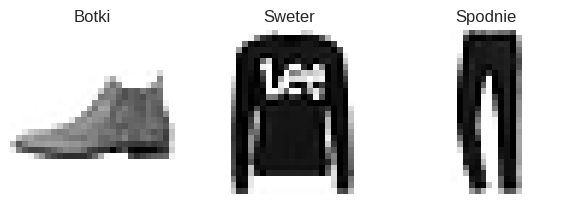

In [58]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [59]:
df_train=red_wine.sample(frac=0.7,random_state=42)
df_valid=red_wine.drop(df_train.index)
display(df_train.head(4))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6,6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5,5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9,6
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8,5


In [60]:
max_=df_train.max(axis=0)
min_=df_train.min(axis=0)

df_train=(df_train-min_)/(max_-min_)
df_valid=(df_valid-min_)/(max_-min_)

In [61]:
X_train=df_train.drop('quality',axis=1)
X_valid=df_valid.drop('quality',axis=1)
y_train=df_train['quality']
y_valid=df_valid['quality']

In [62]:
model = keras.models.Sequential([
    keras.layers.Dense(512,activation='relu',input_shape=[11]),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(1),

])

In [63]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)

In [64]:
model.compile(
    optimizer=optimizer,
    loss='mae'
)

In [65]:
history=model.fit(
    X_train,y_train,
    validation_data=(X_valid,y_valid),
    batch_size=256,
    epochs=30,
)


Epoch 1/30
5/5 [==============================] - 2s 63ms/step - loss: 0.5577 - val_loss: 0.4870
Epoch 2/30
5/5 [==============================] - 0s 30ms/step - loss: 0.4543 - val_loss: 0.3880
Epoch 3/30
5/5 [==============================] - 0s 31ms/step - loss: 0.3543 - val_loss: 0.2917
Epoch 4/30
5/5 [==============================] - 0s 23ms/step - loss: 0.2580 - val_loss: 0.2013
Epoch 5/30
5/5 [==============================] - 0s 36ms/step - loss: 0.1799 - val_loss: 0.1477
Epoch 6/30
5/5 [==============================] - 0s 33ms/step - loss: 0.1460 - val_loss: 0.1375
Epoch 7/30
5/5 [==============================] - 0s 25ms/step - loss: 0.1453 - val_loss: 0.1409
Epoch 8/30
5/5 [==============================] - 0s 30ms/step - loss: 0.1491 - val_loss: 0.1387
Epoch 9/30
5/5 [==============================] - 0s 24ms/step - loss: 0.1448 - val_loss: 0.1311
Epoch 10/30
5/5 [==============================] - 0s 33ms/step - loss: 0.1373 - val_loss: 0.1262
Epoch 11/30
5/5 [============

<Axes: >

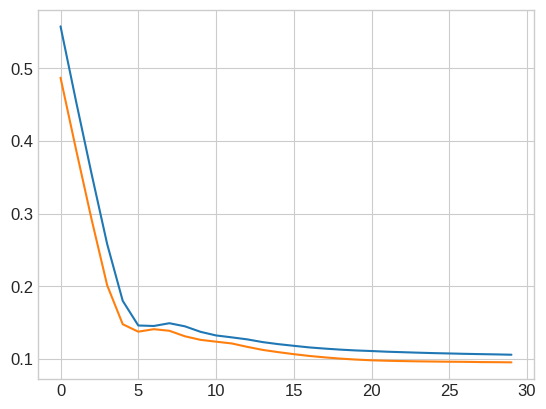

In [66]:
import pandas as pd
history_df=pd.DataFrame(history.history)
history_df['loss'].plot()
history_df['val_loss'].plot()

In [67]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [78]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

X_train

y_train

array([[1.247e+01, 1.860e+01, 8.109e+01, ..., 1.015e-01, 3.014e-01,
        8.750e-02],
       [1.894e+01, 2.131e+01, 1.236e+02, ..., 1.789e-01, 2.551e-01,
        6.589e-02],
       [1.546e+01, 1.948e+01, 1.017e+02, ..., 1.514e-01, 2.837e-01,
        8.019e-02],
       ...,
       [1.152e+01, 1.493e+01, 7.387e+01, ..., 9.608e-02, 2.664e-01,
        7.809e-02],
       [1.422e+01, 2.785e+01, 9.255e+01, ..., 8.219e-02, 1.890e-01,
        7.796e-02],
       [2.073e+01, 3.112e+01, 1.357e+02, ..., 1.659e-01, 2.868e-01,
        8.218e-02]])

In [72]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

In [73]:
X_train

array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

In [74]:
X_test = scaler.transform(X_test)

X_test

ValueError: ignored

In [75]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

ValueError: ignored